In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv("Diabets_World.csv")

In [65]:
variant_country = df.loc[df.COUNTRY == 'AZE']
variant_country

,COUNTRY,COUNTRY_GRP,SEX,YEAR,VALUE
54,AZE,NaN,ALL,1990.0,0.63
55,AZE,NaN,ALL,1991.0,0.62
56,AZE,NaN,ALL,1992.0,0.61
57,AZE,NaN,ALL,1993.0,0.56
58,AZE,NaN,ALL,1994.0,0.55
59,AZE,NaN,ALL,1995.0,0.52
60,AZE,NaN,ALL,1996.0,0.55
61,AZE,NaN,ALL,1997.0,0.54
62,AZE,NaN,ALL,1998.0,0.51
63,AZE,NaN,ALL,1999.0,0.51


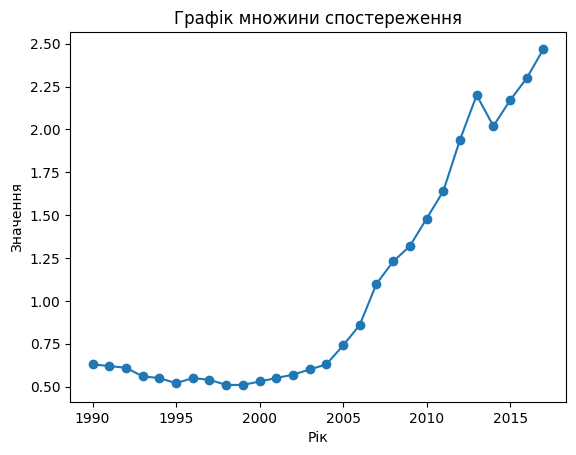

In [66]:
df = pd.DataFrame(variant_country)

years = df['YEAR']
values = df['VALUE']
plt.plot(years, values, marker='o',linestyle='-')
plt.xlabel('Рік')
plt.ylabel('Значення')
plt.title('Графік множини спостереження')
plt.show()

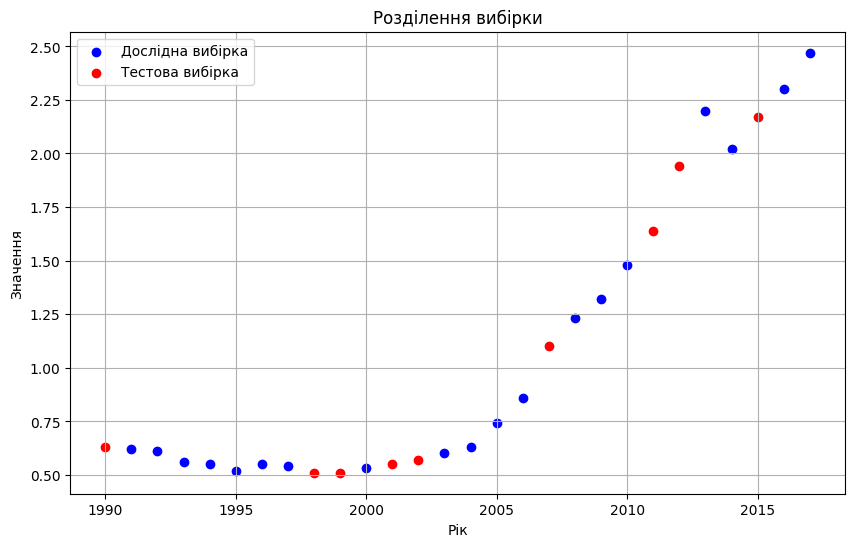

In [67]:
from sklearn.model_selection import train_test_split 

train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
plt.figure(figsize=(10, 6))
plt.scatter(train_df['YEAR'], train_df['VALUE'], color='blue', label='Дослідна вибірка')
plt.scatter(test_df['YEAR'], test_df['VALUE'], color='red', label='Тестова вибірка')
plt.xlabel('Рік')
plt.ylabel('Значення')
plt.title('Розділення вибірки')
plt.legend()
plt.grid(True)
plt.show()

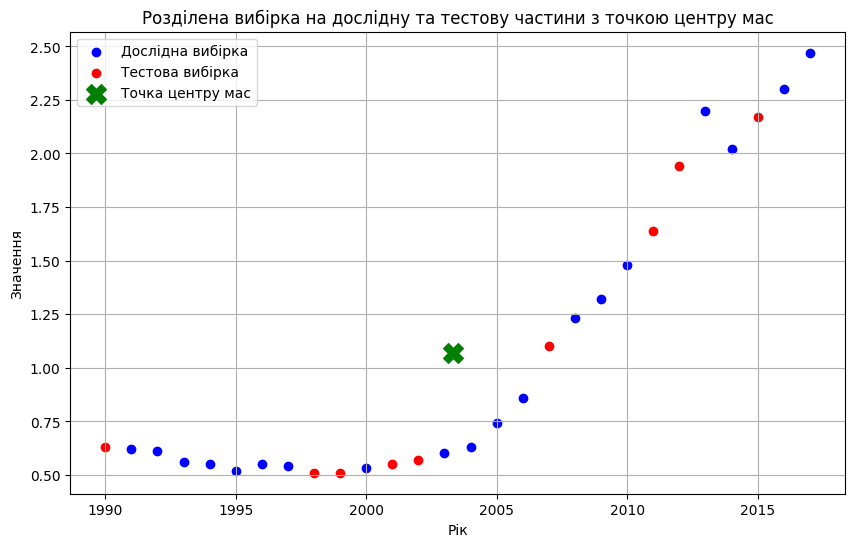

Точка центру мас: Рік - 2003.3157894736842, Значення - 1.07


In [68]:
center_of_mass = {
    'YEAR': train_df['YEAR'].mean(),
    'VALUE': train_df['VALUE'].mean()
}

plt.figure(figsize=(10, 6))
plt.scatter(train_df['YEAR'], train_df['VALUE'], color='blue', label='Дослідна вибірка')
plt.scatter(test_df['YEAR'], test_df['VALUE'], color='red', label='Тестова вибірка')
plt.scatter(center_of_mass['YEAR'], center_of_mass['VALUE'], color='green', marker='X', s=200, label='Точка центру мас')
plt.title('Розділена вибірка на дослідну та тестову частини з точкою центру мас')
plt.xlabel('Рік')
plt.ylabel('Значення')
plt.legend()
plt.grid(True)
plt.show()

print(f"Точка центру мас: Рік - {center_of_mass['YEAR']}, Значення - {center_of_mass['VALUE']}")


In [69]:
def regression(x, y):
    N = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum(x[i] * y[i] for i in range(N))
    sum_x_squared = sum(x[i] ** 2 for i in range(N))
    
    m = (N * sum_xy - sum_x * sum_y) / (N * sum_x_squared - sum_x ** 2)
    b = (sum_y - m * sum_x) / N
    
    return m, b

train_data = train_df.reset_index(drop=True)
m, b = regression(train_data['YEAR'], train_data['VALUE'])
print(f'Коефіцієнти лінійної регресії: m = {m}, b = {b}')


Коефіцієнти лінійної регресії: m = 0.07153389490573475, b = -142.2349811472096


In [70]:
def calculate(m, b, x, y):
    N = len(x)
    return sum((y[i] - (m * x[i] + b)) ** 2 for i in range(N)) / N
m, b = regression(train_data['YEAR'], train_data['VALUE'])

results = []
for i in range(1, 11):
    m_i = i * 0.1
    b_i = b
    mse_i = calculate(m_i, b_i, train_data['YEAR'], train_data['VALUE'])
    results.append({'m': m_i, 'b': b_i, 'MSE': mse_i})
results_df = pd.DataFrame(results)
print(results_df)


     m           b           MSE
0  0.1 -142.234981  3.252186e+03
1  0.2 -142.234981  6.623447e+04
2  0.3 -142.234981  2.094836e+05
3  0.4 -142.234981  4.329996e+05
4  0.5 -142.234981  7.367825e+05
5  0.6 -142.234981  1.120832e+06
6  0.7 -142.234981  1.585149e+06
7  0.8 -142.234981  2.129732e+06
8  0.9 -142.234981  2.754583e+06
9  1.0 -142.234981  3.459700e+06


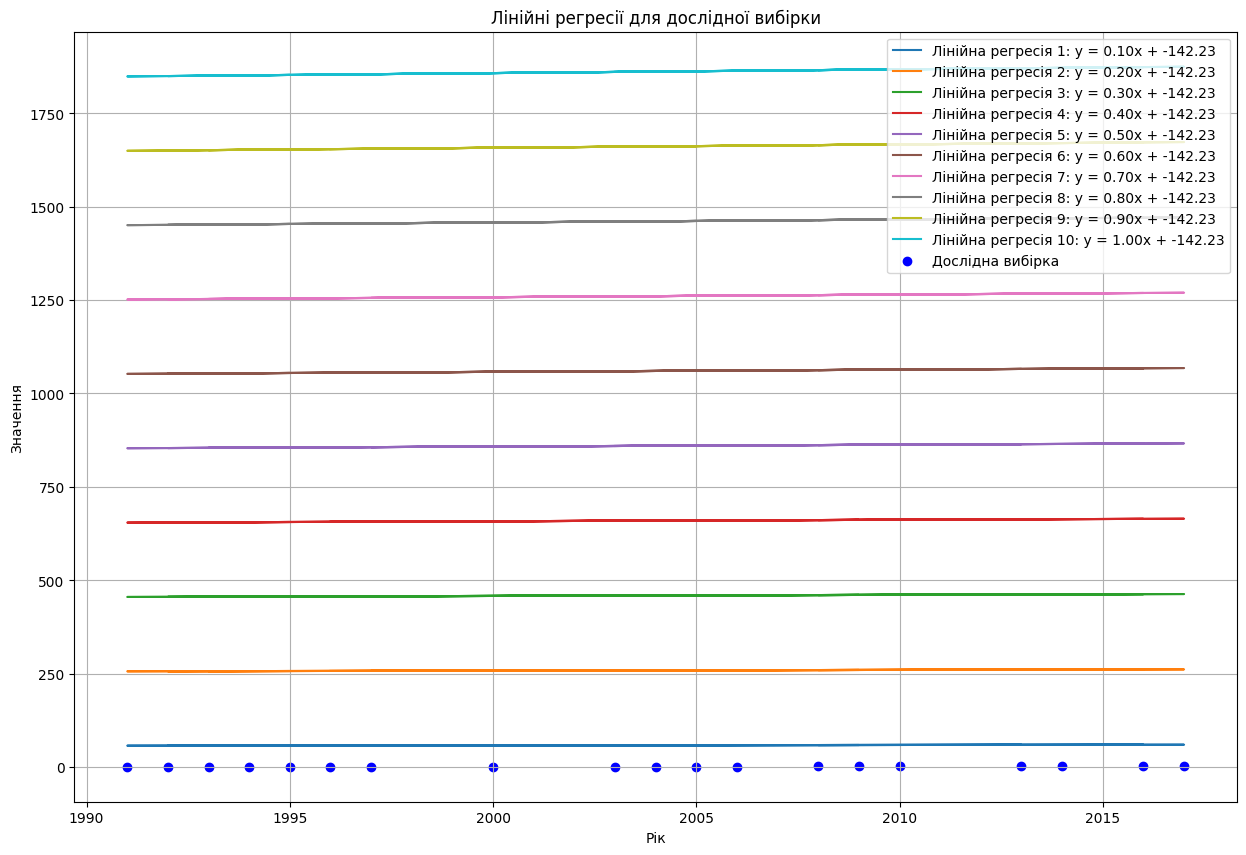

In [71]:
plt.figure(figsize=(15, 10))

for i, row in results_df.iterrows():
    m_i = row['m']
    b_i = row['b']
    plt.plot(train_data['YEAR'], m_i * train_data['YEAR'] + b_i, label=f'Лінійна регресія {i+1}: y = {m_i:.2f}x + {b_i:.2f}')
plt.scatter(train_data['YEAR'], train_data['VALUE'], color='blue', label='Дослідна вибірка')
plt.title('Лінійні регресії для дослідної вибірки')
plt.xlabel('Рік')
plt.ylabel('Значення')
plt.legend()
plt.grid(True)
plt.show()


Оптимальні значення: m = 0.1, b = -142.2349811472096


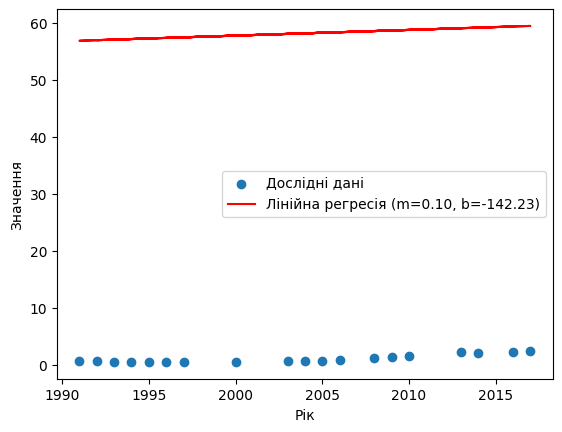

In [72]:
optimal_idx = results_df['MSE'].idxmin()
optimal_m = results_df.loc[optimal_idx, 'm']
optimal_b = b

print(f'Оптимальні значення: m = {optimal_m}, b = {optimal_b}')
plt.scatter(train_data['YEAR'], train_data['VALUE'], label='Дослідні дані')
y_pred = optimal_m * train_data['YEAR'] + optimal_b
plt.plot(train_data['YEAR'], y_pred, color='red', label=f'Лінійна регресія (m={optimal_m:.2f}, b={optimal_b:.2f})')
plt.xlabel('Рік')
plt.ylabel('Значення')
plt.legend()
plt.show()

In [73]:
test_data = test_df.reset_index(drop=True)
test_predictions = optimal_m * test_data['YEAR'] + optimal_b
test_mse = calculate(optimal_m, optimal_b, test_data['YEAR'], test_predictions)
test_results = pd.DataFrame({'m': [optimal_m], 'b': [optimal_b], 'MSE': [test_mse]})
test_results

,m,b,MSE
0,0.1,-142.234981,0.0


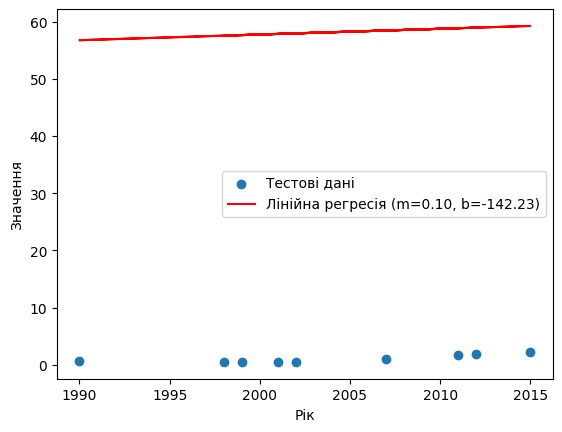

In [74]:
plt.scatter(test_data['YEAR'], test_data['VALUE'], label='Тестові дані')
y_pred = optimal_m * test_data['YEAR'] + optimal_b
plt.plot(test_data['YEAR'], y_pred, color='red', label=f'Лінійна регресія (m={optimal_m:.2f}, b={optimal_b:.2f})')
plt.xlabel('Рік')
plt.ylabel('Значення')
plt.legend()
plt.show()